Source:
https://data.melbourne.vic.gov.au/Transport/Pedestrian-Counting-System-Monthly-counts-per-hour/b2ak-trbp

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("Pedestrians.csv", thousands = ",")
df.index = df.Date_Time.astype('datetime64')
df2 = df.drop_duplicates(subset = 'Date_Time', keep = False)

In [3]:
del df2['Sensor_ID']
del df2['Sensor_Name']
del df2['ID']
del df2['Date_Time']

In [4]:
df2.sort_index(inplace=True)

c:\Users\wh\anaconda3_python\lib\site-packages\pandas\core\frame.py:6393: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().sort_index(


<AxesSubplot:xlabel='Date_Time', ylabel='Hourly_Counts'>

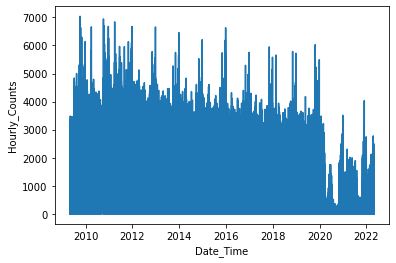

In [5]:
sns.lineplot(x=df2.index, y='Hourly_Counts', data=df2)

In [6]:
df2.head()

,Year,Month,Mdate,Day,Time,Hourly_Counts
Date_Time,,,,,,
2009-05-01 00:00:00,2009,May,1,Friday,0,52
2009-05-01 01:00:00,2009,May,1,Friday,1,34
2009-05-01 02:00:00,2009,May,1,Friday,2,19
2009-05-01 03:00:00,2009,May,1,Friday,3,14
2009-05-01 04:00:00,2009,May,1,Friday,4,15


In [7]:
df2.tail()

,Year,Month,Mdate,Day,Time,Hourly_Counts
Date_Time,,,,,,
2022-04-30 19:00:00,2022,April,30,Saturday,19,489
2022-04-30 20:00:00,2022,April,30,Saturday,20,403
2022-04-30 21:00:00,2022,April,30,Saturday,21,310
2022-04-30 22:00:00,2022,April,30,Saturday,22,445
2022-04-30 23:00:00,2022,April,30,Saturday,23,244


In [8]:
import statsmodels.formula.api as sm

In [9]:
df2['Trend'] = range(1,len(df2)+1)

C:\Users\wh\AppData\Local\Temp/ipykernel_3720/2290489968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Trend'] = range(1,len(df2)+1)


In [10]:
df2['LogPed'] = np.log(df2.Hourly_Counts+1)

C:\Users\wh\AppData\Local\Temp/ipykernel_3720/648830483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['LogPed'] = np.log(df2.Hourly_Counts+1)


In [46]:
df2_in = df2[df2.index < "2020-01-01"]

In [12]:
model = sm.ols(formula="LogPed ~ Trend + C(Month) + C(Day) + C(Time)", data=df2_in)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LogPed   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                 2.088e+04
Date:                Thu, 09 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:26:03   Log-Likelihood:                -78736.
No. Observations:               92563   AIC:                         1.576e+05
Df Residuals:                   92521   BIC:                         1.580e+05
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.7090      0.012    377.070      0.000       4.685       4.734
C(Month)[T.August]       -0.1836      0.009    -20.055      0.000      -0.202      -0.166
C(Month)[T.December]      0.2796      0.009     30.541      0.000       0.262       0.298
C(Month)[T.February]      0.0013      0.010      0.139      0.890      -0.017       0.020
C(Month)[T.January]      -0.0337      0.009     -3.598      0.000      -0.052      -0.015
C(Month)[T.July]         -0.1044      0.009    -11.400      0.000      -0.122      -0.086
C(Month)[T.June]         -0.1383      0.009    -14.981      0.000      -0.156      -0.120
C(Month)[T.March]         0.0082      0.009      0.878      0.380      -0.010       0.027
C(Month)[T.May]          -0.1393      0.009    -15.208      0.000      -0.157      -0.121
C(Month)[T.November]      0.0480      0.009      5.201      0.000       0.030       0.066
C(Month)[T.October]      -0.0879      0.009     -9.534      0.000      -0.106      -0.070
C(Month)[T.September]    -0.1385      0.009    -14.658      0.000      -0.157      -0.120
C(Day)[T.Monday]         -0.4196      0.007    -60.272      0.000      -0.433      -0.406
C(Day)[T.Saturday]       -0.0079      0.007     -1.136      0.256      -0.022       0.006
C(Day)[T.Sunday]         -0.2160      0.007    -31.024      0.000      -0.230      -0.202
C(Day)[T.Thursday]       -0.2361      0.007    -33.866      0.000      -0.250      -0.222
C(Day)[T.Tuesday]        -0.4256      0.007    -61.102      0.000      -0.439      -0.412
C(Day)[T.Wednesday]      -0.3539      0.007    -50.762      0.000      -0.368      -0.340
C(Time)[T.1]             -0.4888      0.013    -37.887      0.000      -0.514      -0.464
C(Time)[T.2]             -0.9306      0.013    -72.102      0.000      -0.956      -0.905
C(Time)[T.3]             -1.1426      0.013    -88.558      0.000      -1.168      -1.117
C(Time)[T.4]             -1.3148      0.013   -101.902      0.000      -1.340      -1.289
C(Time)[T.5]             -1.0567      0.013    -81.902      0.000      -1.082      -1.031
C(Time)[T.6]             -0.0964      0.013     -7.474      0.000      -0.122      -0.071
C(Time)[T.7]              0.8691      0.013     67.358      0.000       0.844       0.894
C(Time)[T.8]              1.7795      0.013    137.920      0.000       1.754       1.805
C(Time)[T.9]              2.2578      0.013    174.989      0.000       2.232       2.283
C(Time)[T.10]             2.7820      0.013    215.617      0.000       2.757       2.807
C(Time)[T.11]             3.1748      0.013    246.062      0.000       3.149       3.200
C(Time)[T.12]             3.6149      0.013    280.173      0.000       3.590       3.640
C(Time)[T.13]             3.7302      0.013    289.112      0.000       3.705       3.756
C(Time)[T.14]          

In [13]:
df2['LogPedFC'] = results.predict(df2)

C:\Users\wh\AppData\Local\Temp/ipykernel_3720/455212463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['LogPedFC'] = results.predict(df2)


In [14]:
df2.head()

,Year,Month,Mdate,Day,Time,Hourly_Counts,Trend,LogPed,LogPedFC
Date_Time,,,,,,,,,
2009-05-01 00:00:00,2009,May,1,Friday,0,52,1,3.970292,4.569758
2009-05-01 01:00:00,2009,May,1,Friday,1,34,2,3.555348,4.080925
2009-05-01 02:00:00,2009,May,1,Friday,2,19,3,2.995732,3.639173
2009-05-01 03:00:00,2009,May,1,Friday,3,14,4,2.708050,3.427148
2009-05-01 04:00:00,2009,May,1,Friday,4,15,5,2.772589,3.254977


<AxesSubplot:xlabel='Date_Time'>

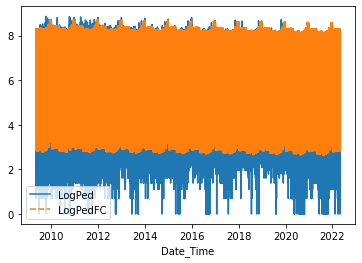

In [15]:
dfplot = df2.filter(['LogPed', 'LogPedFC'])
sns.lineplot(data=dfplot)

<AxesSubplot:xlabel='Date_Time'>

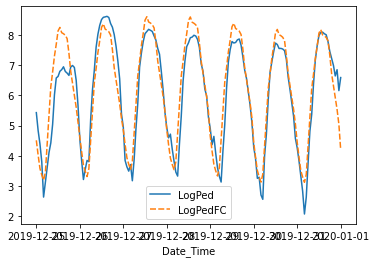

In [16]:
dfplot = df2.filter(['LogPed', 'LogPedFC'])[(df2.index >= '2019-12-25') & (df2.index <= '2020-01-01')]
sns.lineplot(data=dfplot)

In [35]:
df3 = df2[df2.index < '2020-01-01']

In [18]:
insample_err = df3.LogPed - df3.LogPedFC

In [19]:
insample_err

Date_Time
2009-05-01 00:00:00   -0.599466
2009-05-01 01:00:00   -0.525577
2009-05-01 02:00:00   -0.643441
2009-05-01 03:00:00   -0.719098
2009-05-01 04:00:00   -0.482388
                         ...   
2019-12-31 19:00:00    0.501944
2019-12-31 20:00:00    0.677537
2019-12-31 21:00:00    0.724958
2019-12-31 22:00:00    1.313122
2019-12-31 23:00:00    1.110838
Length: 92563, dtype: float64

In [20]:
df2[df2.index == '2022-01-01']

,Year,Month,Mdate,Day,Time,Hourly_Counts,Trend,LogPed,LogPedFC
Date_Time,,,,,,,,,
2022-01-01,2022,January,1,Saturday,0,286,110108,5.659482,4.523659


In [21]:
errsmpl = np.random.choice(insample_err, 10000)

In [22]:
len(errsmpl)

10000

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 4.000e+00,
        9.000e+00, 9.000e+00, 9.000e+00, 3.000e+01, 6.800e+01, 2.390e+02,
        5.230e+02, 1.276e+03, 3.208e+03, 2.921e+03, 1.052e+03, 3.850e+02,
        1.530e+02, 7.600e+01, 2.400e+01, 3.000e+00, 3.000e+00, 1.000e+00]),
 array([-7.52618875, -7.16500683, -6.80382492, -6.442643  , -6.08146108,
        -5.72027916, -5.35909724, -4.99791532, -4.63673341, -4.27555149,
        -3.91436957, -3.55318765, -3.19200573, -2.83082381, -2.4696419 ,
        -2.10845998, -1.74727806, -1.38609614, -1.02491422, -0.6637323 ,
        -0.30255038,  0.05863153,  0.41981345,  0.78099537,  1.14217729,
         1.50335921,  1.86454113,  2.22572304,  2.58690496,  2.94808688,
         3.3092688 ]),
 <BarContainer object of 30 artists>)

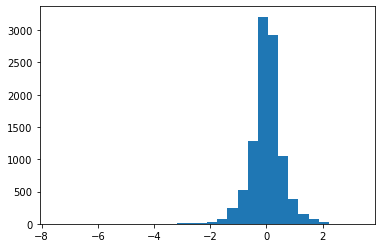

In [23]:
import matplotlib.pyplot as plt
plt.hist(errsmpl, bins = 30)

(array([1.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00,
        7.0000e+00, 1.1000e+01, 1.0000e+01, 2.3000e+01, 2.4000e+01,
        5.3000e+01, 5.7000e+01, 9.3000e+01, 1.5700e+02, 5.3900e+02,
        2.0710e+03, 5.9260e+03, 1.4690e+04, 3.6104e+04, 2.2066e+04,
        6.8270e+03, 2.4150e+03, 1.0130e+03, 3.3300e+02, 7.9000e+01,
        3.1000e+01, 1.4000e+01, 6.0000e+00, 7.0000e+00, 2.0000e+00]),
 array([-7.52618875, -7.12220239, -6.71821603, -6.31422968, -5.91024332,
        -5.50625696, -5.1022706 , -4.69828424, -4.29429788, -3.89031152,
        -3.48632516, -3.0823388 , -2.67835245, -2.27436609, -1.87037973,
        -1.46639337, -1.06240701, -0.65842065, -0.25443429,  0.14955207,
         0.55353843,  0.95752478,  1.36151114,  1.7654975 ,  2.16948386,
         2.57347022,  2.97745658,  3.38144294,  3.7854293 ,  4.18941566,
         4.59340201]),
 <BarContainer object of 30 artists>)

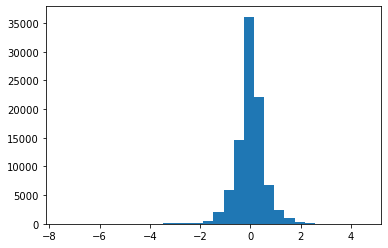

In [24]:
plt.hist(insample_err, bins = 30)

In [25]:
fc_distrib = df2[df2.index == '2022-01-01'].LogPedFC.values + errsmpl

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 4.000e+00,
        9.000e+00, 9.000e+00, 9.000e+00, 3.000e+01, 6.800e+01, 2.390e+02,
        5.230e+02, 1.276e+03, 3.208e+03, 2.921e+03, 1.052e+03, 3.850e+02,
        1.530e+02, 7.600e+01, 2.400e+01, 3.000e+00, 3.000e+00, 1.000e+00]),
 array([-3.00252948, -2.64134756, -2.28016564, -1.91898372, -1.55780181,
        -1.19661989, -0.83543797, -0.47425605, -0.11307413,  0.24810779,
         0.6092897 ,  0.97047162,  1.33165354,  1.69283546,  2.05401738,
         2.4151993 ,  2.77638121,  3.13756313,  3.49874505,  3.85992697,
         4.22110889,  4.58229081,  4.94347272,  5.30465464,  5.66583656,
         6.02701848,  6.3882004 ,  6.74938232,  7.11056424,  7.47174615,
         7.83292807]),
 <BarContainer object of 30 artists>)

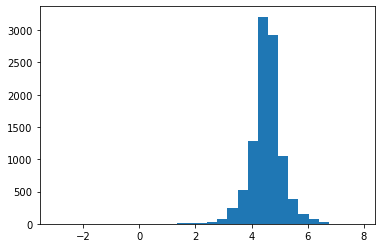

In [26]:
plt.hist(fc_distrib, bins = 30)

In [27]:
np.min(fc_distrib)

-3.002529479850436

In [28]:
np.exp(np.min(fc_distrib))

0.0496612921229163

(array([1.070e+02, 5.930e+02, 1.114e+03, 1.936e+03, 2.467e+03, 1.502e+03,
        7.880e+02, 4.610e+02, 2.970e+02, 1.660e+02, 1.260e+02, 7.500e+01,
        7.200e+01, 4.700e+01, 3.000e+01, 2.800e+01, 2.300e+01, 3.700e+01,
        1.200e+01, 1.800e+01, 1.000e+01, 1.200e+01, 9.000e+00, 1.300e+01,
        5.000e+00, 9.000e+00, 1.000e+00, 9.000e+00, 5.000e+00, 5.000e+00,
        1.000e+00, 3.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+0

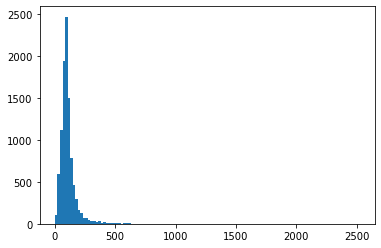

In [29]:
plt.hist(np.exp(fc_distrib), bins = 120)

In [30]:
np.sum(np.abs(errsmpl) >= 532) / len(errsmpl)

0.0

Add one lag as a explenatory variable 

In [45]:
df2['Log_laged'] = df2['LogPed'].shift(1)

C:\Users\wh\AppData\Local\Temp/ipykernel_3720/698015402.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Log_laged'] = df2['LogPed'].shift(1)


In [44]:
df2_in = df2[df2.index < "2020-01-01"]
df2_in

,Year,Month,Mdate,Day,Time,Hourly_Counts,Trend,LogPed,LogPedFC,laged_LogPed
Date_Time,,,,,,,,,,
2009-05-01 00:00:00,2009,May,1,Friday,0,52,1,3.970292,4.569758,NaN
2009-05-01 01:00:00,2009,May,1,Friday,1,34,2,3.555348,4.080925,3.970292
2009-05-01 02:00:00,2009,May,1,Friday,2,19,3,2.995732,3.639173,3.555348
2009-05-01 03:00:00,2009,May,1,Friday,3,14,4,2.708050,3.427148,2.995732
2009-05-01 04:00:00,2009,May,1,Friday,4,15,5,2.772589,3.254977,2.708050
...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00,2019,December,31,Tuesday,19,1360,92559,7.215975,6.714031,7.449498
2019-12-31 20:00:00,2019,December,31,Tuesday,20,1085,92560,6.990257,6.312719,7.215975
2019-12-31 21:00:00,2019,December,31,Tuesday,21,765,92561,6.641182,5.916224,6.990257


In [56]:
model2 = sm.ols(formula="LogPed ~ Trend + C(Month) + C(Day) + C(Time)+ laged_LogPed", data=df2_in)
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 LogPed   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 4.414e+04
Date:                Thu, 09 Jun 2022   Prob (F-statistic):               0.00
Time:                        16:47:10   Log-Likelihood:                -45475.
No. Observations:               92562   AIC:                         9.104e+04
Df Residuals:                   92519   BIC:                         9.144e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.9385      0.015     62.964      0.000       0.909       0.968
C(Month)[T.August]       -0.0523      0.006     -8.171      0.000      -0.065      -0.040
C(Month)[T.December]      0.0814      0.006     12.674      0.000       0.069       0.094
C(Month)[T.February]      0.0007      0.007      0.107      0.914      -0.012       0.014
C(Month)[T.January]      -0.0107      0.007     -1.631      0.103      -0.023       0.002
C(Month)[T.July]         -0.0296      0.006     -4.622      0.000      -0.042      -0.017
C(Month)[T.June]         -0.0391      0.006     -6.058      0.000      -0.052      -0.026
C(Month)[T.March]         0.0026      0.007      0.402      0.688      -0.010       0.015
C(Month)[T.May]          -0.0397      0.006     -6.195      0.000      -0.052      -0.027
C(Month)[T.November]      0.0139      0.006      2.157      0.031       0.001       0.027
C(Month)[T.October]      -0.0245      0.006     -3.796      0.000      -0.037      -0.012
C(Month)[T.September]    -0.0391      0.007     -5.925      0.000      -0.052      -0.026
C(Day)[T.Monday]         -0.1482      0.005    -30.011      0.000      -0.158      -0.139
C(Day)[T.Saturday]       -0.0259      0.005     -5.326      0.000      -0.035      -0.016
C(Day)[T.Sunday]         -0.1251      0.005    -25.681      0.000      -0.135      -0.116
C(Day)[T.Thursday]       -0.0867      0.005    -17.723      0.000      -0.096      -0.077
C(Day)[T.Tuesday]        -0.1422      0.005    -28.748      0.000      -0.152      -0.133
C(Day)[T.Wednesday]      -0.1208      0.005    -24.540      0.000      -0.130      -0.111
C(Time)[T.1]             -0.0578      0.009     -6.337      0.000      -0.076      -0.040
C(Time)[T.2]             -0.1493      0.009    -15.961      0.000      -0.168      -0.131
C(Time)[T.3]             -0.0482      0.010     -4.981      0.000      -0.067      -0.029
C(Time)[T.4]             -0.0674      0.010     -6.839      0.000      -0.087      -0.048
C(Time)[T.5]              0.3136      0.010     31.292      0.000       0.294       0.333
C(Time)[T.6]              1.0896      0.010    111.431      0.000       1.070       1.109
C(Time)[T.7]              1.3690      0.009    149.622      0.000       1.351       1.387
C(Time)[T.8]              1.5897      0.009    176.066      0.000       1.572       1.607
C(Time)[T.9]              1.4176      0.009    150.765      0.000       1.399       1.436
C(Time)[T.10]             1.6001      0.010    163.727      0.000       1.581       1.619
C(Time)[T.11]             1.6184      0.010    157.158      0.000       1.598       1.639
C(Time)[T.12]             1.7779      0.011    165.190      0.000       1.757       1.799
C(Time)[T.13]             1.5788      0.011    139.154      0.000       1.557       1.601
C(Time)[T.14]          

In [57]:
df2['laged_LogPedFC'] = results2.predict(df2)

C:\Users\wh\AppData\Local\Temp/ipykernel_3720/3427454051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['laged_LogPedFC'] = results2.predict(df2)


<AxesSubplot:xlabel='Date_Time'>

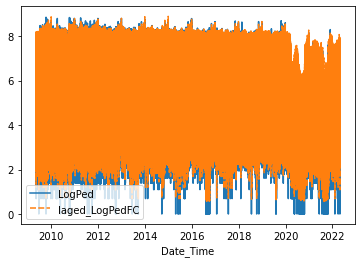

In [59]:
dfplot = df2.filter(['LogPed', 'laged_LogPedFC'])
sns.lineplot(data=dfplot)